# Benzene
## BLYP and double numerical basis for carbon

In [1]:
import errno
import os

# Make a subdirectory for BLYP testing
try:
    os.mkdir('BLYP')
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

os.chdir ('BLYP')

# Compile with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = FALSE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = HORSFIELD**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = GAMMAD**

*# Choose the XC functional*<br>
**XC = BLYP**

### Before we run begin.x - make sure that there is a Fdata directory with a /basis sudirectory. Add the pseudopotentials inside of the /basis subdirectory. 

In [3]:
try:
    os.mkdir('Fdata')
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
try:
    os.mkdir('Fdata/basis')
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

os.system('ls Fdata/basis')

# Result:
# 001.pp  001++.pp  006.pp  006++.pp

001.pp
001++.pp
006.pp
006++.pp


0

In [4]:
os.system('more begin.inp')

# Result:
# James P. Lewis
# H-begin.inp
# C-begin.inp

::::::::::::::
begin.inp
::::::::::::::
James P. Lewis
H-begin.inp
C-begin.inp


0

In [5]:
os.system('more Fdata.inp')

# Result:
# 2                                     ! Number of species
# 1                                     ! atomic numbers
# 6
# Fdata                                 ! Fdata location

::::::::::::::
Fdata.inp
::::::::::::::
2
1
6
'Fdata'

0

### The cutoffs here reflect a 0.10 Ryd excitation - determined after running begin-looprc.x

In [7]:
os.system('more H-begin.inp')

# Result:
# Hydrogen                 atom name
# H                        atom abbreviation
# 1                        atomic number
# 1.008                    atomic mass
# 1.0                      number of valence electrons
# 9                        exchange correlation
# 1                        number of shells
# 0                        angular momentum for s shell
# 1.0                      Qneutral - number of electrons in s shell
# 1.0                      number of electrons in s shell
# 4.10                     cutoff radius for s shell
# 0                        use excited states
# 0                        optimize basis set with x-confinement potential

0

::::::::::::::
H-begin.inp
::::::::::::::
Hydrogen                 atom name
H                        atom abbreviation
1                        atomic number
1.008                    atomic mass
1.0                      number of valence electrons
9                        exchange correlation
1                        number of shells
0                        angular momentum for s shell
1.0                      Qneutral - number of electrons in s shell
1.0                      number of electrons in s shell
4.10                     cutoff radius for s shell
0                        use excited states
0                        optimize basis set with x-confinement potential
0.0                      Vo for s shell
0.0                      r0 for s shell


In [8]:
os.system('more C-begin.inp')

# Result
# Carbon                   atom name
# C                        atom abbreviation
# 6                        atomic number
# 12.011                   atomic mass
# 4.0                      number of valence electrons
# 9                        exchange correlation
# 2                        number of shells
# 0                        angular momentum for s shell
# 2.0                      Qneutral - number of electrons in s shell
# 2.0                      number of electrons in s shell
# 4.35                     cutoff radius for s shell
# 1                        angular momentum for p shell
# 2.0                      Qneutral - number of electrons in p shell
# 2.0                      number of electrons in p shell
# 4.80                     cutoff radius for p shell
# 1                        use excited states
# 2.0                      number of valence electrons (excited)
# 1.0                      number of electrons in s shell (excited)
# 1.0                      number of electrons in p shell (excited)
# 1                        optimize basis set with x-confinement potential
# 0.0                      Vo for s shell
# 0.0                      r0 for s shell
# 0.0                      Vo for p shell
# 0.0                      r0 for p shell
# 2.5                      Vo for s shell (excited)
# 0.0                      r0 for s shell (excited)
# 2.5                      Vo for p shell (excited)
# 0.0                      r0 for p shell (excited)

::::::::::::::
C-begin.inp
::::::::::::::
Carbon                   atom name
C                        atom abbreviation
6                        atomic number
12.011                   atomic mass
4.0                      number of valence electrons
9                        exchange correlation
2                        number of shells
0                        angular momentum for s shell
2.0                      Qneutral - number of electrons in s shell
2.0                      number of electrons in s shell
4.35                     cutoff radius for s shell
1                        angular momentum for p shell
2.0                      Qneutral - number of electrons in p shell
2.0                      number of electrons in p shell
4.80                     cutoff radius for p shell
1                        use excited states
2.0                      number of valence electrons (excited)
1.0                      number of electrons in s shell (excited)
1.0                      number of

0

In [9]:
# Run begin.x - make sure you copied the executable to this directory first!
os.system('./begin.x')

0

### Plot the resulting wavefunctions and Hartree potentials

['001.wf-s0.dat']


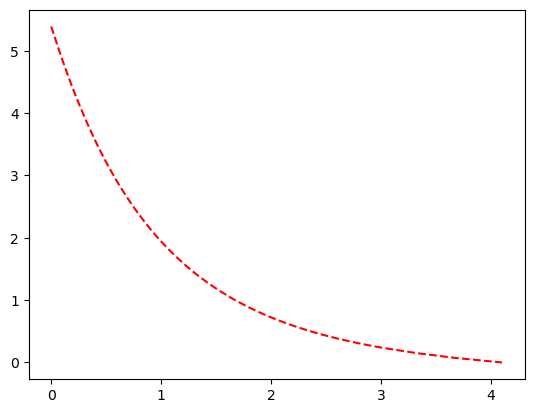

['001.na.dat', '001.na-s0.dat']


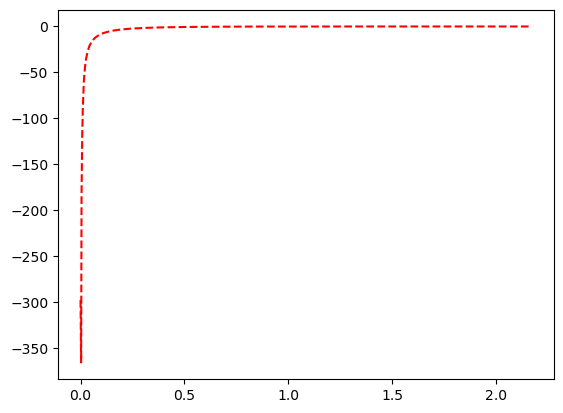

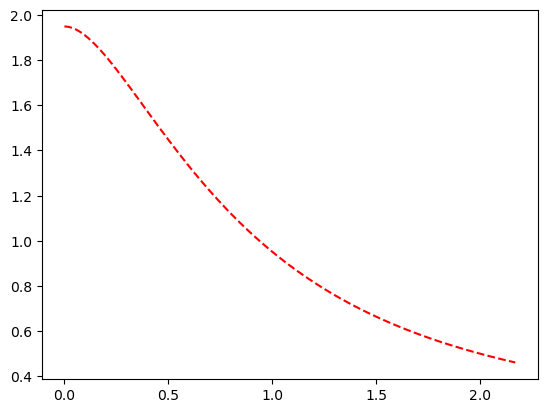

In [10]:
import csv
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Plot wavefunctions
files = glob.glob('001.wf*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()
    
# Plot Hartree potentials
files = glob.glob('001.na*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()

['006.wf-p1.dat', '006.wf-s1.dat', '006.wf-s0.dat', '006.wf-p0.dat']


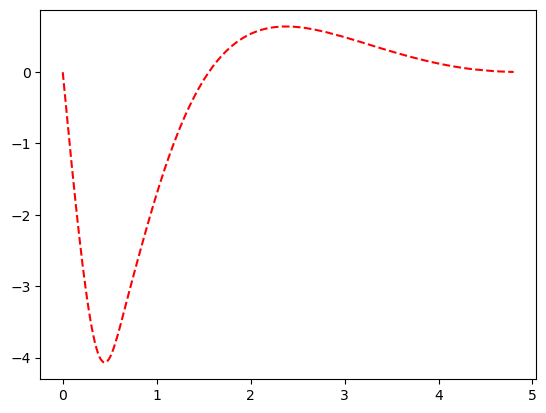

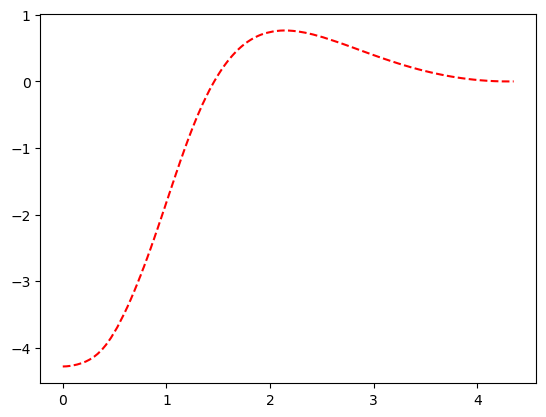

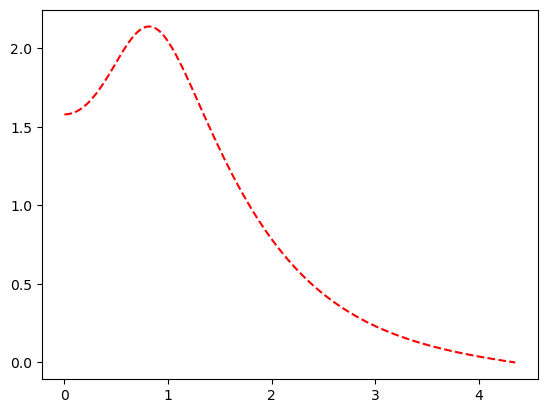

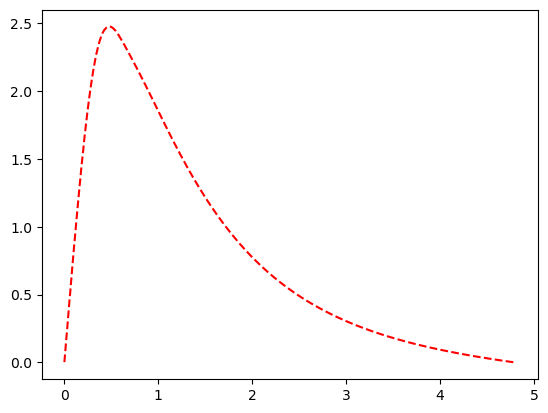

['006.na.dat', '006.na-p0.dat', '006.na-s1.dat', '006.na-s0.dat', '006.na-p1.dat']


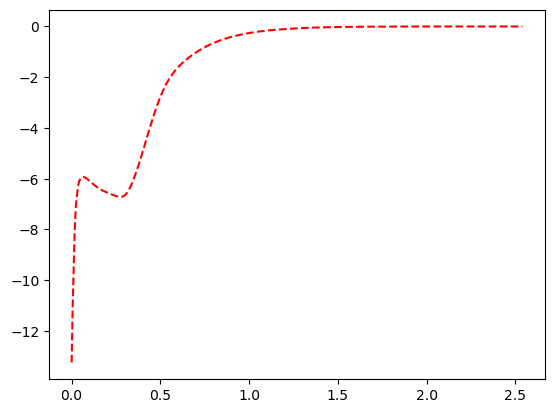

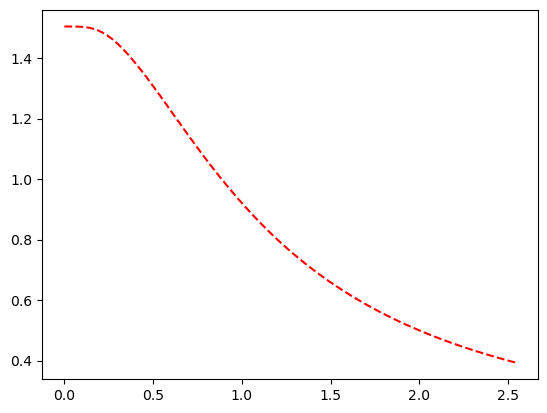

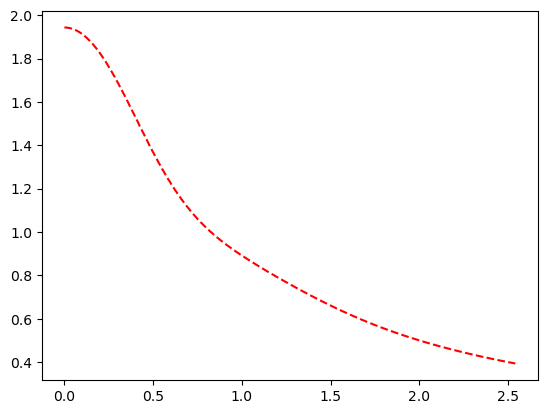

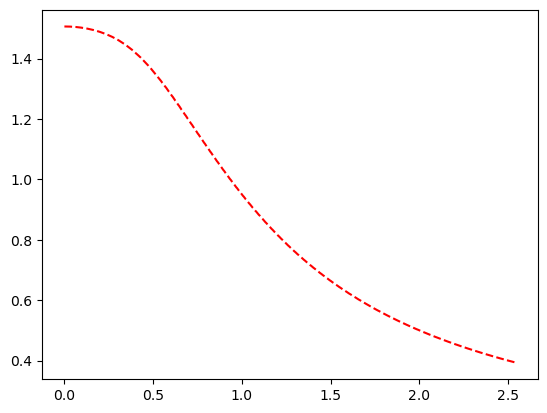

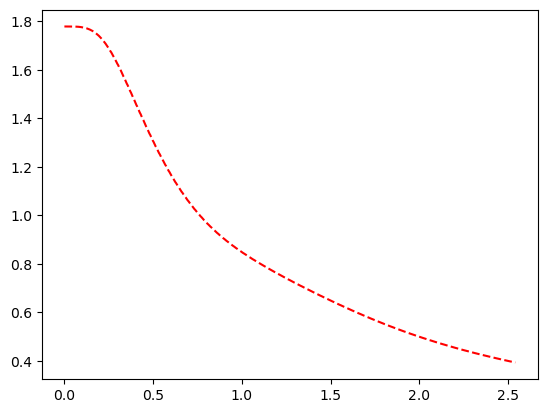

In [11]:
import csv
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Plot wavefunctions
files = glob.glob('006.wf*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()
    
# Plot Hartree potentials
files = glob.glob('006.na*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()

### Fit Gaussians to the wavefunctions - needed later for MultiWFN code

Fitting parameters: shell = 0, Nzeta0 = 3, Nzeta_max = 10, Ntry = 4, tol = 1e-05
::: The 1st try for Nzeta = 3 ...
Success!: Fitting error 5.093167310114383e-06 meet the tolerance 1e-05 for 3 gaussians.


0

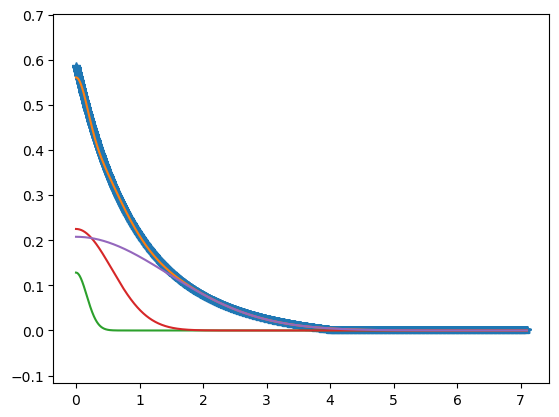

In [12]:
# Hydrogen
from thunder_ase.utils import fit_gaussian
fit_gaussian (input_name = '001.wf-s0.dat', plot = True)
os.system('mv 001.wf-s0.gbs Fdata/basis')
os.system('mv 001.wf-s0-fitting.png Fdata/basis')

Fitting parameters: shell = 0, Nzeta0 = 3, Nzeta_max = 10, Ntry = 4, tol = 1e-05
::: The 1st try for Nzeta = 3 ...
Success!: Fitting error 1.722275259454408e-06 meet the tolerance 1e-05 for 3 gaussians.


0

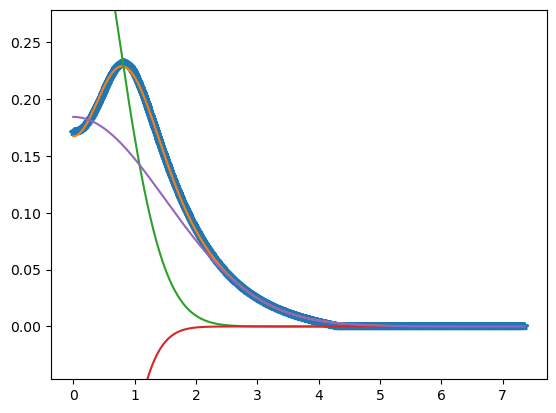

In [13]:
# Carbon 
fit_gaussian (input_name = '006.wf-s0.dat', plot = True)
os.system('mv 006.wf-s0.gbs Fdata/basis')
os.system('mv 006.wf-s0-fitting.png Fdata/basis')

Fitting parameters: shell = 1, Nzeta0 = 3, Nzeta_max = 10, Ntry = 4, tol = 1e-05
::: The 1st try for Nzeta = 3 ...
Success!: Fitting error 3.1005303494834374e-06 meet the tolerance 1e-05 for 3 gaussians.


0

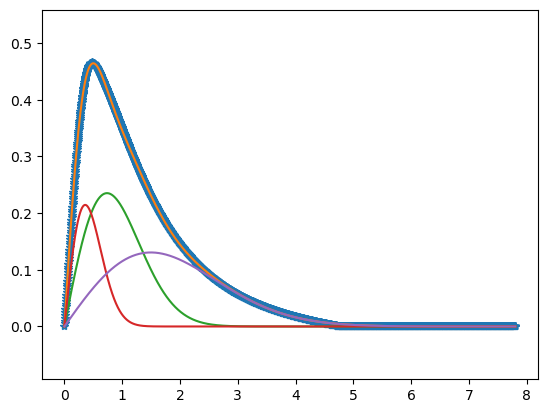

In [14]:
fit_gaussian (input_name = '006.wf-p0.dat', plot = True)
os.system('mv 006.wf-p0.gbs Fdata/basis')
os.system('mv 006.wf-p0-fitting.png Fdata/basis')

Fitting parameters: shell = 0, Nzeta0 = 3, Nzeta_max = 10, Ntry = 4, tol = 1e-05
::: The 1st try for Nzeta = 3 ...
::: The 2nd try for Nzeta = 3 ...
::: The 3rd try for Nzeta = 3 ...
::: The 4th try for Nzeta = 3 ...
Fitting error 0.00016940678611954442 didn't meet the tolerance 1e-05 for 3 gaussians after 4 try.
::: The 1st try for Nzeta = 4 ...
::: The 2nd try for Nzeta = 4 ...
::: The 3rd try for Nzeta = 4 ...
::: The 4th try for Nzeta = 4 ...
Fitting error 2.0592671197444462e-05 didn't meet the tolerance 1e-05 for 4 gaussians after 4 try.
::: The 1st try for Nzeta = 5 ...
Success!: Fitting error 3.947418493081806e-06 meet the tolerance 1e-05 for 5 gaussians.


0

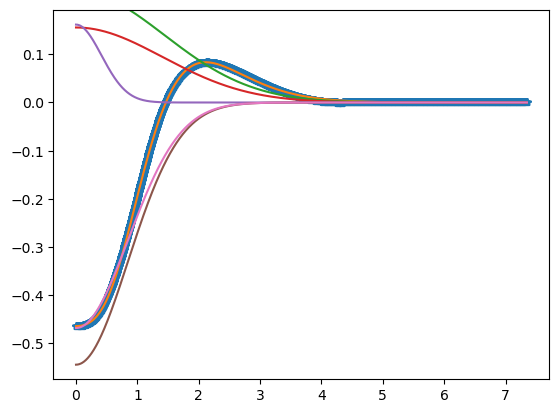

In [15]:
fit_gaussian (input_name = '006.wf-s1.dat', plot = True)
os.system('mv 006.wf-s1.gbs Fdata/basis')
os.system('mv 006.wf-s1-fitting.png Fdata/basis')

Fitting parameters: shell = 1, Nzeta0 = 3, Nzeta_max = 10, Ntry = 4, tol = 1e-05
::: The 1st try for Nzeta = 3 ...
::: The 2nd try for Nzeta = 3 ...
::: The 3rd try for Nzeta = 3 ...
::: The 4th try for Nzeta = 3 ...
Fitting error 2.5771101536249973e-05 didn't meet the tolerance 1e-05 for 3 gaussians after 4 try.
::: The 1st try for Nzeta = 4 ...
::: The 2nd try for Nzeta = 4 ...
::: The 3rd try for Nzeta = 4 ...
::: The 4th try for Nzeta = 4 ...
Fitting error 2.3269654979445508e-05 didn't meet the tolerance 1e-05 for 4 gaussians after 4 try.
::: The 1st try for Nzeta = 5 ...
::: The 2nd try for Nzeta = 5 ...
::: The 3rd try for Nzeta = 5 ...
::: The 4th try for Nzeta = 5 ...
Fitting error 2.0965122700813418e-05 didn't meet the tolerance 1e-05 for 5 gaussians after 4 try.
::: The 1st try for Nzeta = 6 ...
::: The 2nd try for Nzeta = 6 ...
::: The 3rd try for Nzeta = 6 ...
::: The 4th try for Nzeta = 6 ...
Fitting error 2.023544442718062e-05 didn't meet the tolerance 1e-05 for 6 gaussia

0

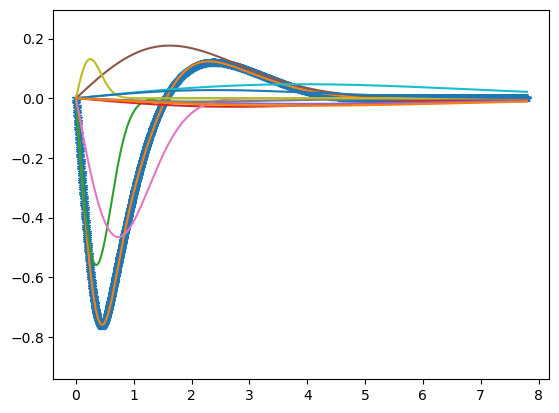

In [16]:
fit_gaussian (input_name = '006.wf-p1.dat', plot = True)
os.system('mv 006.wf-p1.gbs Fdata/basis')
os.system('mv 006.wf-p1-fitting.png Fdata/basis')

### Compile create.x with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = TRUE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = MCWEDA**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = GAMMAD**

*# Choose the XC functional*<br>
**XC = BLYP**

In [17]:
# Run MPI version of create.x - make sure you copied the executable to this directory first!
os.system('mpirun -np 8 ./create.x')

0

## Preparation

In [15]:
# link the executables
!rm fireball-ase.x
!ln -s ~/thunder2024/fireball/src/fireball-ase.x

In [16]:
# link the Fdata
!rm Fdata
!ln -s ~/thunder2024/datafiles/Fdata-Horsfield-0.10-9SN.Hs4.10-9DN.Cs4.35p4.80-NEW Fdata

In [17]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase
import sys
from ase.build import molecule
from ase import units

# Socket Communication
# from ase.calculators.socketio import SocketIOCalculator

# ase BFGS optimization
from ase.optimize import BFGS

# ase MD modules
from ase.md.verlet import VelocityVerlet as NVE
from ase.md.nvtberendsen import NVTBerendsen

## Example 1: Optimization

In [18]:
# clean last run result
!./clean.com

In [20]:
# Read benzene structure
atoms = ase.io.read('benzene.xyz')

# Sockets
kwargs = {'nstepi':1,
          'nstepf':100,
          'ipi': 1,
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

# Optimization the Structure
fireball.minimize(atoms, fmax=0.1, method='MDMin')

fmax: 2.15864, force rms: 1.63174
fmax: 1.28862, force rms: 0.95241
fmax: 0.65933, force rms: 0.55360
fmax: 0.40503, force rms: 0.34893
fmax: 0.38839, force rms: 0.27554
fmax: 0.25873, force rms: 0.18347
fmax: 0.20183, force rms: 0.16980
fmax: 0.12045, force rms: 0.10566
fmax: 0.22403, force rms: 0.15846
fmax: 0.16867, force rms: 0.09648
fmax: 0.16867, force rms: 0.09648
 Error in reading from socket


 ENDED 


In [ ]:
!mkdir minimize
!mv output.log minimize
!mv 001* minimize
!mv structures.* minimize
!mv minimize.* minimize

## Example 2: NVE Ensemble

In [ ]:
# clean last run result
!./clean.com

In [ ]:
# Read benzene structure
atoms = ase.io.read('benzene.xyz')

# Sockets
max_step = 1000
kwargs = {'ipi': 1,  # open I-PI socket to speed up
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

atoms.rattle(stdev=0.1)
dyn = NVE(atoms, timestep=0.25 * units.fs, trajectory='md-nve.traj', logfile='md-nve.log')
fireball.dynamics(dyn, steps=max_step)

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   r

Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 

Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 byt

Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:

Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   send

 ENDED 


In [ ]:
!mkdir nve
!mv output.log nve
!mv 001* nve
!mv structures.* nve
!mv md-nve.* nve

## Example 3: NVT Ensemble

In [ ]:
# clean last run result
!./clean.com

In [ ]:
# Read benzene structure
atoms = ase.io.read('benzene.xyz')

# Sockets
max_step = 1000
kwargs = {'ipi': 1,  # open I-PI socket to speed up
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

atoms.rattle(stdev=0.1)
dyn = NVTBerendsen(atoms, timestep=0.25 * units.fs, temperature = 300, taut = 0.5*1000*units.fs,
                   trajectory='md-nvt.traj', logfile='md-nvt.log')
fireball.dynamics(dyn, steps=max_step)

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driv

Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Dri

Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvms

Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:  

Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 4 bytes of <class 'numpy.int32'>
Driver:   send 120 bytes of <class 'numpy.float64'>
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'HAVEDATA'
Driver:  sendrecv_force
Driver:   sendmsg 'GETFORCE'
Driver:   recvmsg 'FORCEREADY'
Driver:   recv 8 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 120 bytes of <class 'numpy.float64'>
Driver:   recv 72 bytes of <class 'numpy.float64'>
Driver:   recv 4 bytes of <class 'numpy.int32'>
Driver:   recv 1 bytes of <class 'numpy.int8'>
Driver: calculate
Driver:  status
Driver:   sendmsg 'STATUS'
Driver:   recvmsg 'READY'
Driver:  sendposdata
Driver:   sendmsg 'POSDATA'
Driver:   send 72 bytes of <class 'numpy.float64'>
Driver:   send 72 bytes

ConnectionResetError: [Errno 104] Connection reset by peer

In [ ]:
!mkdir nvt
!mv output.log nvt
!mv 001* nvt
!mv structures.* nvt
!mv md-nvt.* nvt

## Example 4: Localized Vibration (0.0125 displacement) - NVE Ensemble

In [ ]:
# clean last run result
!./clean.com

In [ ]:
# Read benzene structure
atoms = ase.io.read('benzene-0.0125.xyz')

# Sockets
max_step = 10000
kwargs = {'ipi': 1,  # open I-PI socket to speed up
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

dyn = NVE(atoms, timestep=0.25 * units.fs, trajectory='md-0.0125-nve.traj', logfile='md-0.0125-nve.log')
fireball.dynamics(dyn, steps=max_step)

In [ ]:
!mkdir nve-0.0125
!mv output.log nve-0.0125
!mv 001* nve-0.0125
!mv structures.* nve-0.0125
!mv md-0.0125-nve.* nve-0.0125

## Example 5: Localized Vibration (0.025 displacement) - NVE Ensemble

In [ ]:
# clean last run result
!./clean.com

In [ ]:
# Read benzene structure
atoms = ase.io.read('benzene-0.025.xyz')

# Sockets
max_step = 10000
kwargs = {'ipi': 1,  # open I-PI socket to speed up
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

dyn = NVE(atoms, timestep=0.25 * units.fs, trajectory='md-0.025-nve.traj', logfile='md-0.025-nve.log')
fireball.dynamics(dyn, steps=max_step)

In [ ]:
!mkdir nve-0.025
!mv output.log nve-0.025
!mv 001* nve-0.025
!mv structures.* nve-0.025
!mv md-0.025-nve.* nve-0.025

# Benzene - PBE and double numerical basis set for carbon

In [ ]:
# Compile with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = FALSE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = HORSFIELD**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = GAMMAD**

*# Choose the XC functional*<br>
**XC = PBE**

## Preparation

In [4]:
# link the executables
!rm fireball-ase.x
!ln -s ~/thunder2024/fireball/src/fireball-ase.x

In [10]:
# link the Fdata
!rm Fdata
!ln -s ~/thunder2024/datafiles/Fdata-Horsfield-0.10-6SN.Hs4.10-6DN.Cs4.35p4.80 Fdata

In [11]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase
import sys
from ase.build import molecule
from ase import units

# Socket Communication
# from ase.calculators.socketio import SocketIOCalculator

# ase BFGS optimization
from ase.optimize import BFGS

# ase MD modules
from ase.md.verlet import VelocityVerlet as NVE
from ase.md.nvtberendsen import NVTBerendsen

## Example 1: Optimization

In [12]:
# clean last run result
!./clean.com

In [14]:
# Read methane structure
atoms = ase.io.read('benzene.xyz')

# Sockets
kwargs = {'nstepi':1,
          'nstepf':100,
          'ipi': 1,
          'iwriteout_charges': 1,
          }

fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)
atoms.calc = fireball

# Optimization the Structure
fireball.minimize(atoms, fmax=0.1, method='MDMin')

fmax: 42354.02975, force rms: 29978.33263


forrtl: severe (174): SIGSEGV, segmentation fault occurred
Image              PC                Routine            Line        Source             
libc.so.6          00007F8891514520  Unknown               Unknown  Unknown
fireball-ase.x     000000000049371B  Unknown               Unknown  Unknown
fireball-ase.x     000000000040541D  Unknown               Unknown  Unknown
libc.so.6          00007F88914FBD90  Unknown               Unknown  Unknown
libc.so.6          00007F88914FBE40  __libc_start_main     Unknown  Unknown
fireball-ase.x     0000000000405335  Unknown               Unknown  Unknown


ConnectionResetError: [Errno 104] Connection reset by peer